<a href="https://colab.research.google.com/github/lorenzofilitti/Corpus-Material/blob/main/Vettori.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install sentence-transformers
from sentence_transformers import SentenceTransformer

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 227.1/227.1 kB 3.5 MB/s eta 0:00:00


/usr/local/lib/python3.10/dist-packages/sentence_transformers/cross_encoder/CrossEncoder.py:11: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange


In [ ]:
!pip install spacy scikit-learn pandas numpy matplotlib

In [ ]:
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

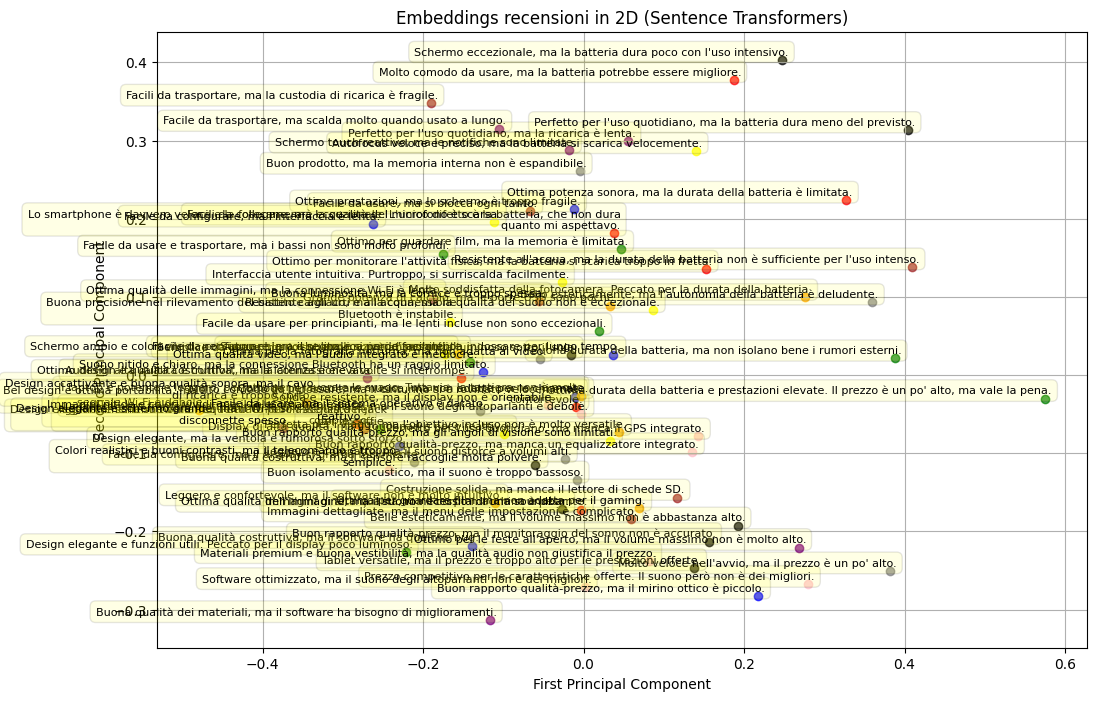

In [ ]:
# Load the Sentence Transformer model

import json

file = open('recensioni2.json',  encoding='utf-8')
data = json.load(file)
Recensioni = []
for prodotti in data["Prodotti"]:
    for recensioni in prodotti["recensioni"]:
      Recensioni.append(recensioni["testo"])


model = SentenceTransformer('all-MiniLM-L6-v2')

# Get sentence vectors
vectors = model.encode(Recensioni)

# Reduce to 2 dimensions using PCA
pca = PCA(n_components=2)
vectors_2d = pca.fit_transform(vectors)

# Plot the sentences in 2D space
plt.figure(figsize=(12, 8))

categories = ["Prestazioni", "Batteria", "Display", "Audio", "Design", "Comfort", "Connettività", "Qualità", "Software", "Prezzo"]

colors = ['red', 'green', 'blue', 'yellow', 'purple', 'orange', 'pink', 'brown', 'gray', 'black']
for i, (Recensioni, category) in enumerate(zip(Recensioni, categories * 8)):
    plt.scatter(vectors_2d[i, 0], vectors_2d[i, 1], c=colors[i % len(colors)], alpha=0.7)
    plt.annotate(Recensioni, (vectors_2d[i, 0], vectors_2d[i, 1]), xytext=(5, 2),
                 textcoords='offset points', ha='right', va='bottom',
                 bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.1),
                 fontsize=8, wrap=True)

plt.title("Embeddings recensioni in 2D (Sentence Transformers)")
plt.xlabel("First Principal Component")
plt.ylabel("Second Principal Component")
plt.grid(True)

# Add a legend
#for category, color in colors.items():
 #   plt.scatter([], [], c=color, alpha=0.7, label=category)
#plt.legend()

# Save the plot as an SVG
#plt.savefig('sentence_embeddings_2d_transformers.svg', format='svg', bbox_inches='tight')
#print("Plot saved as 'sentence_embeddings_2d_transformers.svg'")


In [ ]:
!pip install txtai
import txtai

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 227.7/227.7 kB 11.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.0/27.0 MB 21.8 MB/s eta 0:00:00


In [ ]:
file = open('recensioni2.json',  encoding='utf-8')
data = json.load(file)
Recensioni = []
for prodotti in data["Prodotti"]:
    for recensioni in prodotti["recensioni"]:
      Recensioni.append(recensioni["testo"])

embeddings = Embeddings(path="sentence-transformers/nli-mpnet-base-v2", content=True)
#emb = txtai.Embeddings()
embeddings.index([(i, Recensioni[i], None) for i in range(len(Recensioni))])
embeddings.search("durata della batteria")

[{'id': '92',
  'text': 'Buona durata della batteria, ma lo schermo è troppo riflettente.',
  'score': 0.7067313194274902},
 {'id': '11',
  'text': "Ottima durata della batteria e prestazioni elevate. Il prezzo è un po' alto, ma vale la pena.",
  'score': 0.7018110752105713},
 {'id': '41',
  'text': 'Buona durata della batteria, ma non isolano bene i rumori esterni.',
  'score': 0.6913439631462097}]

In [ ]:
from txtai import Embeddings

# Create embeddings model, backed by sentence-transformers & transformers
embeddings = Embeddings(path="sentence-transformers/nli-mpnet-base-v2")

data = [
  "US tops 5 million confirmed virus cases",
  "Canada's last fully intact ice shelf has suddenly collapsed, " +
  "forming a Manhattan-sized iceberg",
  "Beijing mobilises invasion craft along coast as Taiwan tensions escalate",
  "The National Park Service warns against sacrificing slower friends " +
  "in a bear attack",
  "Maine man wins $1M from $25 lottery ticket",
  "Make huge profits without work, earn up to $100,000 a day"
]

# Index the list of text
embeddings.index(data)

print(f"{'Query':20} Best Match")
print("-" * 50)

# Run an embeddings search for each query
for query in ("feel good story", "climate change", "public health story", "war",
              "wildlife", "asia", "lucky", "dishonest junk"):
    # Extract uid of first result
    # search result format: (uid, score)
    uid = embeddings.search(query, 1)[0][0]

    # Print text
    print(f"{query:20} {data[uid]}")

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/587 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/1.19k [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

Query                Best Match
--------------------------------------------------
feel good story      Maine man wins $1M from $25 lottery ticket
climate change       Canada's last fully intact ice shelf has suddenly collapsed, forming a Manhattan-sized iceberg
public health story  US tops 5 million confirmed virus cases
war                  Beijing mobilises invasion craft along coast as Taiwan tensions escalate
wildlife             The National Park Service warns against sacrificing slower friends in a bear attack
asia                 Beijing mobilises invasion craft along coast as Taiwan tensions escalate
lucky                Maine man wins $1M from $25 lottery ticket
dishonest junk       Make huge profits without work, earn up to $100,000 a day


In [4]:
import torch
import json
from sentence_transformers import SentenceTransformer

embedder = SentenceTransformer("multi-qa-mpnet-base-cos-v1")

f = open("risultati_valutazione-4000 (1).json", "r")
data = json.load(f)
corpus = []

for i in data:
  for n in i:
    corpus.append(i["r_txt"])

corpus_embeddings = embedder.encode(corpus, convert_to_tensor=True)



/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/9.25k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/571 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

KeyboardInterrupt: 

In [8]:
len(n)

11

In [ ]:
# Query sentences:
queries = [
    "A man is eating pasta.",
    "Someone in a gorilla costume is playing a set of drums.",
    "A cheetah chases prey on across a field.",
]

# Find the closest 5 sentences of the corpus for each query sentence based on cosine similarity
top_k = min(5, len(corpus))
for query in queries:
    query_embedding = embedder.encode(query, convert_to_tensor=True)

    # We use cosine-similarity and torch.topk to find the highest 5 scores
    similarity_scores = embedder.similarity(query_embedding, corpus_embeddings)[0]
    scores, indices = torch.topk(similarity_scores, k=top_k)

    print("\nQuery:", query)
    print("Top 5 most similar sentences in corpus:")

    for score, idx in zip(scores, indices):
        print(corpus[idx], "(Score: {:.4f})".format(score))
